In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from tensorflow.keras.utils import to_categorical

**Load CIFAR-10 dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Normalize pixel values to between 0 and 1**

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

**One-hot encode the labels**

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Choose between ResNet50 or VGG16**

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Freeze the convolutional base**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

**Add custom dense layers**

In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

**Create the final model**

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 753s 961ms/step - accuracy: 0.4727 - loss: 1.5024 - val_accuracy: 0.5555 - val_loss: 1.2539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 808s 969ms/step - accuracy: 0.5884 - loss: 1.1760 - val_accuracy: 0.5811 - val_loss: 1.1783
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 781s 942ms/step - accuracy: 0.6172 - loss: 1.0897 - val_accuracy: 0.6054 - val_loss: 1.1324
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 738s 944ms/step - accuracy: 0.6375 - loss: 1.0382 - val_accuracy: 0.6078 - val_loss: 1.1134
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 741s 943ms/step - accuracy: 0.6552 - loss: 0.9853 - val_accuracy: 0.6159 - val_loss: 1.0968
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 764s 971ms/step - accuracy: 0.6676 - loss: 0.9467 - val_accuracy: 0.6133 - val_loss: 1.1065
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 780s 943ms/step - accuracy: 0.6802 - loss: 0.9126 - val_accuracy: 0.6203 - val_loss: 1.0959
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 754s 964ms/step - accuracy: 0.6924 -

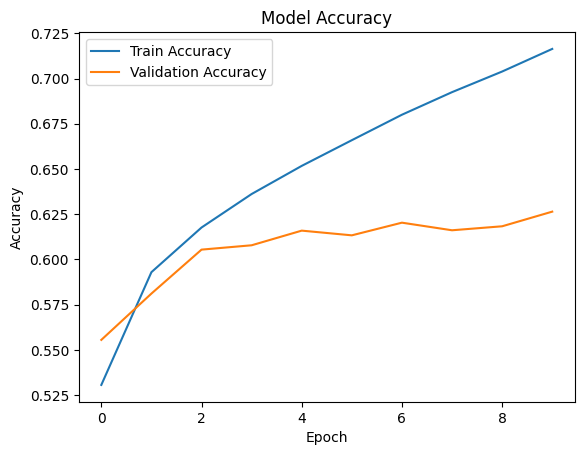

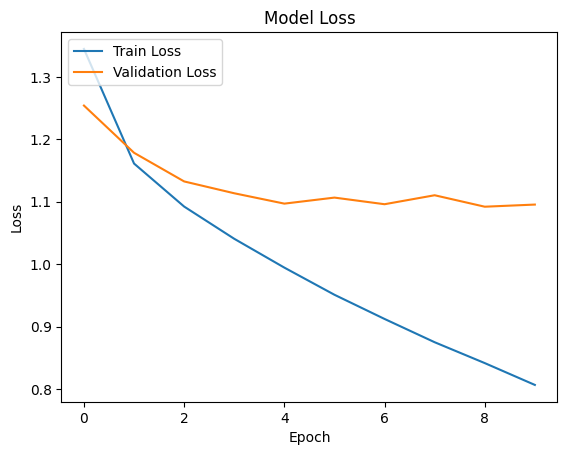

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

**Evaluate the model on the test set**

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 464ms/step


**Calculate accuracy, precision, and recall**

In [ ]:
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.6264
Precision: 0.6282275766572555
Recall: 0.6264


In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1000
           1       0.73      0.69      0.71      1000
           2       0.57      0.51      0.54      1000
           3       0.47      0.41      0.44      1000
           4       0.62      0.52      0.56      1000
           5       0.51      0.60      0.55      1000
           6       0.60      0.74      0.66      1000
           7       0.67      0.71      0.69      1000
           8       0.79      0.71      0.75      1000
           9       0.67      0.60      0.63      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000

